## 1. Загрузка данных

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1i9BwxECaqzCY76kvA44_V7eFEa4UXwg7')
data

,CustomerId,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
0,8b4f8c66-7589-4734-8ada-2d42f60540ab,100.40,2019-06-04,6,0.35,0.08,0.609740,0.949383
1,2151b2a2-8867-4986-9e00-449c2b4f89e9,170.00,2019-05-25,4,0.66,0.16,0.942272,0.479846
2,3111db79-6721-4ec0-82b1-30b810649c5e,70.75,2019-05-25,6,0.92,0.20,0.323030,0.007076
3,9cb76426-cc5d-4fa3-88bc-b92314b9f4e8,75.00,2019-03-20,10,0.35,0.78,0.876833,0.088974
4,5d86caeb-2d53-44a7-b379-7f15f06ca821,94.51,2019-04-10,5,0.51,0.44,0.912099,0.206194
...,...,...,...,...,...,...,...,...
15995,3e0cc750-5787-4843-8192-92eb92d0baf2,110.00,2019-05-31,5,0.22,0.92,0.279858,0.012416
15996,48d1512b-9291-4c69-84da-2e896e8b5250,175.00,2019-05-16,9,0.66,0.55,0.045826,0.025403
15997,6c09d459-a312-4162-a8ce-a4ea43bf177a,94.21,2019-03-06,2,0.41,0.80,0.438510,0.665808
15998,1f0cb9c5-111a-4927-8ed1-01402929ee65,3.35,2019-01-05,1,0.75,0.17,0.009277,0.572111


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Monetary   16000 non-null  float64
 1   Recency    16000 non-null  object 
 2   Frequency  16000 non-null  int64  
 3   factor_1   16000 non-null  float64
 4   factor_2   16000 non-null  float64
 5   factor_3   16000 non-null  float64
 6   factor_4   16000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 875.1+ KB


In [ ]:
data.describe()

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,129.972264,106.945562,3.950687,0.500008,0.497864,0.495451,0.498427
std,179.809263,50.857916,5.189864,0.290144,0.291103,0.289034,0.288478
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000037,0.000033
25%,20.910000,74.000000,1.000000,0.250000,0.240000,0.242545,0.248739
50%,59.275000,116.000000,2.000000,0.500000,0.500000,0.496410,0.498833
75%,170.000000,157.000000,5.000000,0.750000,0.750000,0.744476,0.747424
max,3040.000000,165.000000,111.000000,1.000000,1.000000,0.999996,0.999943


## 2. Предобработка данных

### 1) Удаление столбца CustomerID

In [ ]:
data.drop('CustomerId', axis=1, inplace=True)
data.head()

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
0,100.40,2019-06-04,6,0.35,0.08,0.609740,0.949383
1,170.00,2019-05-25,4,0.66,0.16,0.942272,0.479846
2,70.75,2019-05-25,6,0.92,0.20,0.323030,0.007076
3,75.00,2019-03-20,10,0.35,0.78,0.876833,0.088974
4,94.51,2019-04-10,5,0.51,0.44,0.912099,0.206194


### 2) Преобразование признака Recency

In [ ]:
from datetime import datetime

data['Recency'] = data['Recency'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month * 30 + datetime.strptime(x, '%Y-%m-%d').day)
data['Recency'] = data['Recency'] - data['Recency'].min()

data.head()

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
0,100.40,153,6,0.35,0.08,0.609740,0.949383
1,170.00,144,4,0.66,0.16,0.942272,0.479846
2,70.75,144,6,0.92,0.20,0.323030,0.007076
3,75.00,79,10,0.35,0.78,0.876833,0.088974
4,94.51,99,5,0.51,0.44,0.912099,0.206194


## 3. Определение оптимального числа кластеров, кластеризация

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Text(0, 0.5, 'Sum of squared distances')

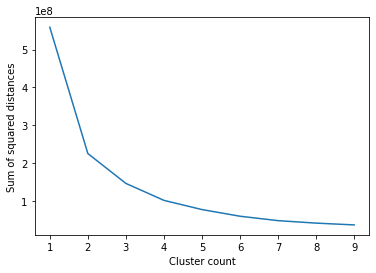

In [ ]:
max_cluster_count = 9
cluster_count_range = range(1, max_cluster_count + 1)
inertia = []
for cluster_count in cluster_count_range:
    kmeans = KMeans(n_clusters=cluster_count)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(cluster_count_range, inertia)
plt.xticks(cluster_count_range)
plt.xlabel('Cluster count')
plt.ylabel('Sum of squared distances')

In [ ]:
optimal_cluster_count = 3

In [ ]:
kmeans = KMeans(n_clusters=optimal_cluster_count, n_init=100)
kmeans.fit(data)
labels = kmeans.labels_

## 4. Визуализация кластеров

In [ ]:
data_labeled = data.copy()
data_labeled['label'] = labels
data_labeled

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4,label
0,100.40,153,6,0.35,0.08,0.609740,0.949383,1
1,170.00,144,4,0.66,0.16,0.942272,0.479846,1
2,70.75,144,6,0.92,0.20,0.323030,0.007076,1
3,75.00,79,10,0.35,0.78,0.876833,0.088974,1
4,94.51,99,5,0.51,0.44,0.912099,0.206194,1
...,...,...,...,...,...,...,...,...
15995,110.00,150,5,0.22,0.92,0.279858,0.012416,1
15996,175.00,135,9,0.66,0.55,0.045826,0.025403,1
15997,94.21,65,2,0.41,0.80,0.438510,0.665808,1
15998,3.35,4,1,0.75,0.17,0.009277,0.572111,1


In [ ]:
data_labeled['label'].value_counts()

1    12241
0     3121
2      638
Name: label, dtype: int64

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

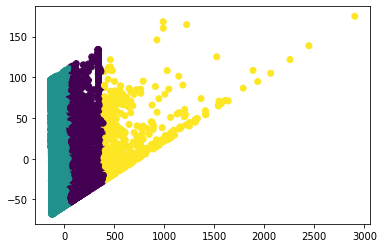

In [ ]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels)

## 5. Интерпретация результатов кластеризации

Количество клиентов, относящихся к каждому кластеру

In [ ]:
data_labeled['label'].value_counts().sort_index()

0     3121
1    12241
2      638
Name: label, dtype: int64

Доля клиентов, относящихся к каждому кластеру, в %

In [ ]:
data_labeled['label'].value_counts().sort_index() / data_labeled.shape[0] * 100

0    19.50625
1    76.50625
2     3.98750
Name: label, dtype: float64

Средние значения признаков для каждого кластера

In [ ]:
data_labeled.groupby('label').mean()

,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
label,,,,,,,
0,308.360413,127.725409,7.219161,0.490663,0.499417,0.492626,0.498404
1,52.662964,100.009885,2.469896,0.501497,0.497734,0.496310,0.497746
2,740.620737,138.365204,16.373041,0.517147,0.492759,0.492780,0.511604


Суммарные средства, которые принесли в продукт пользователи каждого кластера

In [ ]:
profit_per_class = data_labeled.groupby('label')['Monetary'].sum()
total_profit = profit_per_class.sum()
profit_per_class

label
0    962392.85
1    644647.34
2    472516.03
Name: Monetary, dtype: float64

Доля средств, принесенных в продукт клиентами из каждого кластера, в %

In [ ]:
profit_per_class / total_profit * 100

label
0    46.278761
1    30.999274
2    22.721965
Name: Monetary, dtype: float64

### Кластер 2

Пользователи из кластера 2:
- приносят наибольший объем средств на пользователя
- чаще всего совершают платежи
- в среднем совершили последний платеж наиболее недавно

Это – самые ценные клиенты. При этом их количество невелико, чуть меньше 4%. Но, несмотря на их малое количество, они принесли в продукт 23% всех средств.

Очень важно удержать этих клиентов, поддерживать их лояльность. При введении программы лояльности этих клиентов стоит отнести к привилегированной группе.

### Кластер 1

Пользователи из кластера 1:
- приносят наименьший объем средств на пользователя
- реже всего совершают платежи
- в среднем совершили последний платеж наиболее давно

Это – наиболее массовый класс клиентов, их количество составляет 76.5%. Ценность каждого клиента в отдельности невелика. 

При этом этот класс очень важен сам по себе, так как клиенты этого класса принесли в продукт 46% средств, больше, чем любой другой класс.

Эти клиенты совершают платежи достаточно редко и пока не имеют сформированной лояльности к компании. Вероятно, часть этих клиентов – новые клиенты, в будущем часть из них с высокой вероятностью может перейти в другие классы.

В отношении этого класса нужно действовать в двух направлениях:
- Привлекать новых клиентов
- Поощрять переход клиентов этого класса в другие классы, например, с помощью программ лояльности.

### Кластер 0

Этот класс является промежуточным между двумя предыдущими классами. Клиенты этого класса составляют 19.5% и приносят 31% прибыли.

Следует работать над удержанием этих клиентов. Кроме того, по возможности следует поощрять их переход в класс 2.